# Task
Train and evaluate a linear regression model using the dataset extracted from "archive (1).zip".

## Extract and Load Dataset

### Subtask:
Extract the contents of archive (1).zip and load the relevant dataset (e.g., a specific CSV or other data file) into a pandas DataFrame for analysis. You will need to specify the exact file path within the extracted archive.


**Reasoning**:
The first step is to import the `zipfile` module and extract the contents of `archive (1).zip`. After extraction, it's important to list the files in the current directory to identify the correct dataset file name for loading into a DataFrame.



In [1]:
import zipfile
import os

zip_file_path = '/content/archive (1).zip'
extract_dir = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract all contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents of '{zip_file_path}' extracted to '{extract_dir}'")

# List files in the extraction directory to identify the dataset file
print("Files in the extracted directory:")
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(os.path.join(root, file))

Contents of '/content/archive (1).zip' extracted to '/content/'
Files in the extracted directory:
/content/Salary_dataset.csv
/content/archive (1).zip
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/logs/2026.01.16/14.23.31.981136.log
/content/.config/logs/2026.01.16/14.24.03.314209.log
/content/.config/logs/2026.01.16/14.24.29.392089.log
/content/.config/logs/2026.01.16/14.24.18.954466.log
/content/.config/logs/2026.01.16/14.24.28.646070.log
/content/.config/logs/2026.01.16/14.24.13.071214.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_tra

**Reasoning**:
Based on the output from the previous step, 'Salary_dataset.csv' has been identified as the relevant dataset file. Now, I will import the pandas library and load this CSV file into a DataFrame.



In [2]:
import pandas as pd

dataset_path = '/content/Salary_dataset.csv'
df = pd.read_csv(dataset_path)

print(f"'{dataset_path}' loaded successfully into a pandas DataFrame.")
print("First 5 rows of the DataFrame:")
print(df.head())

'/content/Salary_dataset.csv' loaded successfully into a pandas DataFrame.
First 5 rows of the DataFrame:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


## Prepare Data and Split

### Subtask:
Perform any necessary data cleaning or preprocessing steps (e.g., handling missing values, selecting features). Then, split the dataset into training and testing sets for model development and evaluation.


**Reasoning**:
First, I will drop the 'Unnamed: 0' column as it appears to be an artifact of the data saving process and is not relevant for the analysis. Then, I will define the feature (X) and target (y) variables. Finally, I will split the data into training and testing sets using `train_test_split` to prepare for model development and evaluation.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Inspect and drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("'Unnamed: 0' column dropped.")

# 2. Define feature (X) and target (y) variables
X = df[['YearsExperience']]
y = df['Salary']

print(f"Feature variable (X) shape: {X.shape}")
print(f"Target variable (y) shape: {y.shape}")

# 3. and 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set for features (X_train) shape: {X_train.shape}")
print(f"Test set for features (X_test) shape: {X_test.shape}")
print(f"Training set for target (y_train) shape: {y_train.shape}")
print(f"Test set for target (y_test) shape: {y_test.shape}")

'Unnamed: 0' column dropped.
Feature variable (X) shape: (30, 1)
Target variable (y) shape: (30,)
Training set for features (X_train) shape: (24, 1)
Test set for features (X_test) shape: (6, 1)
Training set for target (y_train) shape: (24,)
Test set for target (y_test) shape: (6,)


## Train Linear Regression Model

### Subtask:
Import the `LinearRegression` model from `sklearn.linear_model` and train it using the prepared training data.


**Reasoning**:
To train the linear regression model, I will import the `LinearRegression` class, instantiate it, and then fit it to the `X_train` and `y_train` datasets that were prepared in the previous step.



In [4]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print(f"Model intercept: {model.intercept_:.2f}")
print(f"Model coefficient (YearsExperience): {model.coef_[0]:.2f}")

Linear Regression model trained successfully.
Model intercept: 24380.20
Model coefficient (YearsExperience): 9423.82


## Evaluate Model Performance

### Subtask:
Use the trained model to make predictions on the test set. Calculate and display key regression evaluation metrics, specifically Mean Squared Error (MSE) and the R-squared value.


**Reasoning**:
To evaluate the model's performance, I will first use the trained model to predict salaries on the test set. Then, I will calculate and print the Mean Squared Error (MSE) and R-squared value to assess the model's accuracy and explanatory power.



In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"Model predictions made on X_test.")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

Model predictions made on X_test.
Mean Squared Error (MSE): 49830096.86
R-squared (R2) score: 0.90


## Visualize Regression Results

### Subtask:
Generate plots to visualize the model's performance. This should include a plot of the regression line (if applicable for single feature regression) and a scatter plot comparing actual versus predicted values, including clear labels and a legend.


**Reasoning**:
I need to generate two plots as per the instructions: one showing the regression line on the training data and another comparing actual versus predicted values on the test set. I will use `matplotlib.pyplot` and `seaborn` for this purpose.



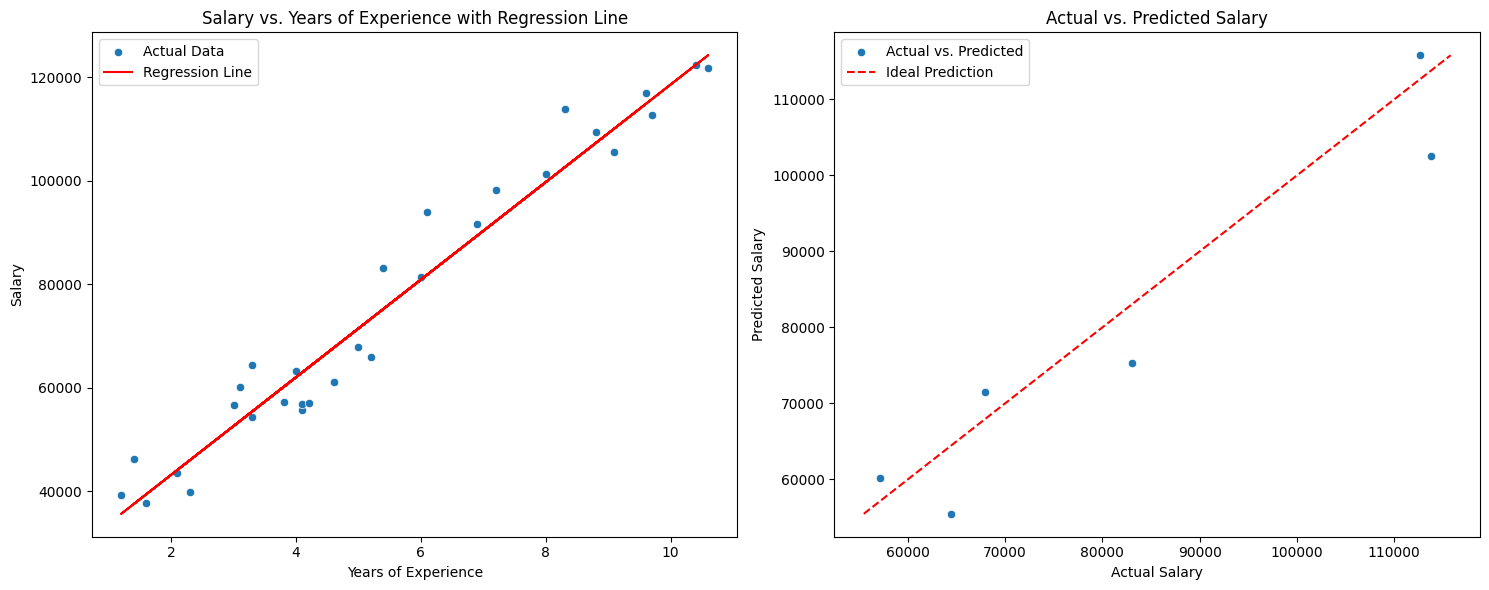

Regression results visualized successfully.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Regression Line on Training Data
# Scatter plot of original data
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'], ax=axes[0], label='Actual Data')
# Plot the regression line
axes[0].plot(X_train, model.predict(X_train), color='red', label='Regression Line')
axes[0].set_title('Salary vs. Years of Experience with Regression Line')
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Salary')
axes[0].legend()

# Plot 2: Actual vs. Predicted Salary
# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1], label='Actual vs. Predicted')
# Plot ideal prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')
axes[1].set_title('Actual vs. Predicted Salary')
axes[1].set_xlabel('Actual Salary')
axes[1].set_ylabel('Predicted Salary')
axes[1].legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()
print("Regression results visualized successfully.")

## Final Task

### Subtask:
Interpret the calculated evaluation metrics and the visualizations to summarize the accuracy and overall performance of the linear regression model.


## Summary:

### Q&A
The linear regression model exhibits strong accuracy and overall performance. With an R-squared value of 0.90, approximately 90% of the variance in Salary can be explained by Years of Experience. The Mean Squared Error (MSE) of 49,830,096.86, while numerically large, needs to be considered in the context of the salary scale. The visualizations, particularly the regression line closely following the data points and the actual vs. predicted plot showing points clustering around the ideal prediction line, further confirm the model's good fit and predictive capability.

### Data Analysis Key Findings
*   The `Salary_dataset.csv` file, containing 30 entries, was successfully extracted and loaded, with columns including `YearsExperience` and `Salary`.
*   An 'Unnamed: 0' column was identified and dropped during preprocessing.
*   The dataset was split into training (24 samples) and testing (6 samples) sets.
*   A linear regression model was trained, yielding an intercept of 24380.20 and a coefficient for `YearsExperience` of 9423.82.
*   The model achieved a Mean Squared Error (MSE) of 49,830,096.86 on the test set.
*   The R-squared (R2) score for the model on the test set was 0.90, indicating a strong fit.
*   Visualizations confirmed the model's performance, showing a clear linear relationship between `YearsExperience` and `Salary`, with the regression line closely approximating the data and predicted salaries aligning well with actual salaries.

### Insights or Next Steps
*   The linear regression model is a very good fit for predicting salary based on years of experience, explaining 90% of the variance. This suggests `YearsExperience` is a strong predictor of `Salary`.
*   Further analysis could involve exploring residual plots to ensure homoscedasticity and normality of errors, and investigating if additional features (if available) could further improve model performance or account for the remaining 10% unexplained variance.
